In [2]:
import pandas as pd
import spacy
import re

In [3]:
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_csv("../data/childrens_books.csv")

In [ ]:
df.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."


## Preprocessed the data

1. Make it lower case

In [ ]:
df["desc_cleaned"] = df["Description"].str.lower()

df["desc_cleaned"]

0                         where the wild things are follows max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. as their king, max tames the beasts and eventually returns home to find his supper waiting for him. this iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through sendak's whimsical illustrations and story.
1                               the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. eric carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. the simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. it’s a staple in early childhood education.
2          the giving tree is a touching and bittersweet story about a tree that gives everything it

2. Remove Special Characters like Non breking Spaces

In [ ]:
df["desc_cleaned"] = df["desc_cleaned"].str.replace("\xa0", " ")

df.desc_cleaned.iloc[0]

"where the wild things are follows max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. as their king, max tames the beasts and eventually returns home to find his supper waiting for him. this iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through sendak's whimsical illustrations and story."

3. Remove punctuation and white spaces

In [ ]:
df["desc_cleaned"] = df["desc_cleaned"].str.replace(r"[^\w\s]", "", regex=True)

df.desc_cleaned.iloc[0]

'where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story'

In [ ]:
df

,Ranking,Title,Author,Year,Rating,Description,desc_cleaned
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly eric carles use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers the simple engaging story introduces children to days of the week counting and the concept of metamorphosis its a staple in early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",the giving tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life as the boy grows up he takes more from the tree and the tree continues to give even when it has little left silversteins minimalist text and illustrations convey deep themes of unconditional love selflessness and the passage of time it has sparked much discussion about relationships and sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",in green eggs and ham samiam tries to convince a reluctant character to try a dish of green eggs and ham despite his resistance through repetition and rhyme dr seusss classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone the playful illustrations and humorous dialogue make it a fun and educational read for young readers
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a

In [ ]:
import spacy

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp

In [ ]:
phrase = df.desc_cleaned[0]
phrase

'where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story'

### Instantiate the Spacy object with our text

In [ ]:
doc = nlp(phrase)
doc

where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story

## Tokenize the documents

In [ ]:
[token.text for token in doc]

['where',
 'the',
 'wild',
 'things',
 'are',
 'follows',
 'max',
 'a',
 'young',
 'boy',
 'who',
 'after',
 'being',
 'sent',
 'to',
 'his',
 'room',
 'for',
 'misbehaving',
 'imagines',
 'sailing',
 'to',
 'an',
 'island',
 'filled',
 'with',
 'wild',
 'creatures',
 'as',
 'their',
 'king',
 'max',
 'tames',
 'the',
 'beasts',
 'and',
 'eventually',
 'returns',
 'home',
 'to',
 'find',
 'his',
 'supper',
 'waiting',
 'for',
 'him',
 'this',
 'iconic',
 'book',
 'explores',
 'themes',
 'of',
 'imagination',
 'adventure',
 'and',
 'the',
 'complex',
 'emotions',
 'of',
 'childhood',
 'all',
 'captured',
 'through',
 'sendaks',
 'whimsical',
 'illustrations',
 'and',
 'story']

## Extract the base word (Lemmatization)

In [ ]:
[token.lemma_ for token in doc]

['where',
 'the',
 'wild',
 'thing',
 'be',
 'follow',
 'max',
 'a',
 'young',
 'boy',
 'who',
 'after',
 'be',
 'send',
 'to',
 'his',
 'room',
 'for',
 'misbehave',
 'imago',
 'sail',
 'to',
 'an',
 'island',
 'fill',
 'with',
 'wild',
 'creature',
 'as',
 'their',
 'king',
 'max',
 'tame',
 'the',
 'beast',
 'and',
 'eventually',
 'return',
 'home',
 'to',
 'find',
 'his',
 'supper',
 'wait',
 'for',
 'he',
 'this',
 'iconic',
 'book',
 'explore',
 'theme',
 'of',
 'imagination',
 'adventure',
 'and',
 'the',
 'complex',
 'emotion',
 'of',
 'childhood',
 'all',
 'capture',
 'through',
 'sendak',
 'whimsical',
 'illustration',
 'and',
 'story']

## Filter out stop words

In [ ]:
norm = [token.lemma_ for token in doc if not token.is_stop]
#norm

In [ ]:
print(len(doc), len(norm))
' '.join(norm)

68 39


'wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story'

## Make one utility function for pre processing

In [ ]:
def token_lemma_nonstop(text, verbose=False):
    """Tokenize and lemmatize text, ignoring stop words."""
    if not text:
        return [], [], []

    # Pre Process the text and remove spaces
    text = text.lower()
    text = text.replace("\xa0", " ")
    text = re.sub(r'[^\w\s]', '', text)

    doc = nlp(text)
    
    tokens = [token.text for token in doc]
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    pos = [token.pos_ for token in doc if not token.is_stop]
    entity = [token.ent_type_ for token in doc if not token.is_stop]

    if verbose:
        print("===============")
        print("Token:         ", ' '.join(tokens))
        print("Lemmitization: ", ' '.join(lemmas))
        print("POSpeech Tags: ", ' '.join(pos))
        print("Entity Type:   ", ' '.join(entity))
    
    return tokens, lemmas, pos, entity

In [ ]:
results = [token_lemma_nonstop(desc, True) for desc in df.desc_cleaned]

df['tokens'], df['lemmas'], df['pos_tags'], df['entity_type'] = zip(*results)

Token:          where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
Lemmitization:  wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
POSpeech Tags:  ADJ NOUN VERB PROPN ADJ NOUN VERB NOUN VERB NOUN VERB NOUN VERB ADJ NOUN NOUN PROPN VERB NOUN ADV VERB ADV VERB NOUN VERB ADJ NOUN VERB NOUN NOUN NOUN ADJ NOUN NOUN VERB NOUN ADJ NOUN NOUN
Entity Type:       PERSON             PERSON                      
Token:          

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

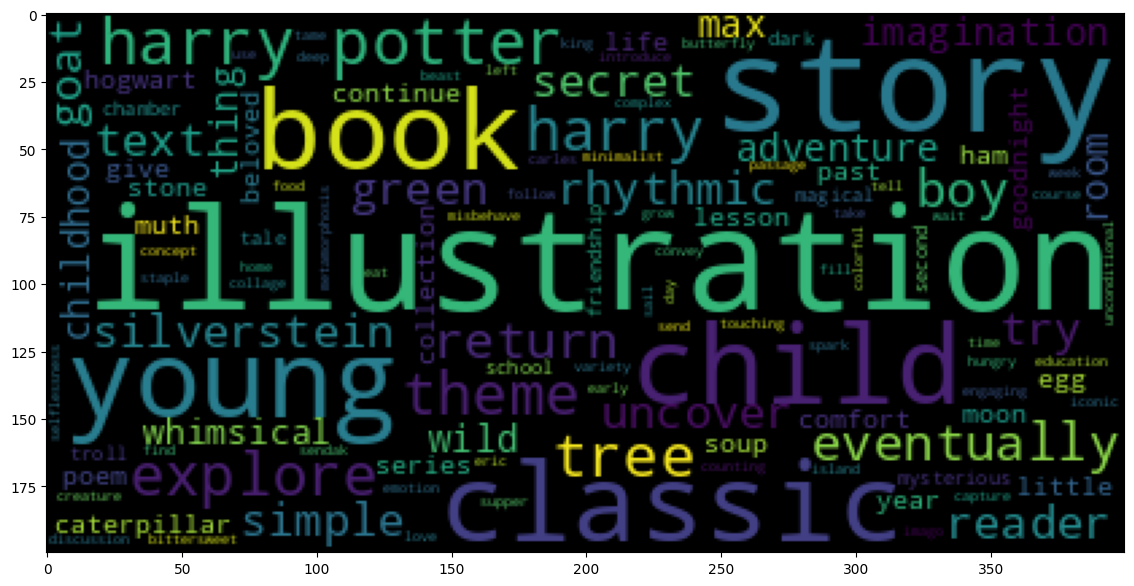

In [ ]:
wc = WordCloud()
wc.generate(str(df["lemmas"]))

plt.figure(figsize=(15, 7))
plt.imshow(wc)
plt.show()